## Task 1 – Dimensionality reduction

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")

In [20]:
data = pd.read_csv("./IE582_Fall21_HW2_q1_data.csv")
data.head()

,X1,X2,class
0,0.569483,0.822003,a
1,0.411469,0.911424,a
2,0.417385,-0.908730,a
3,-0.791828,0.610745,a
4,-0.806777,-0.590857,a


<Figure size 1500x500 with 0 Axes>

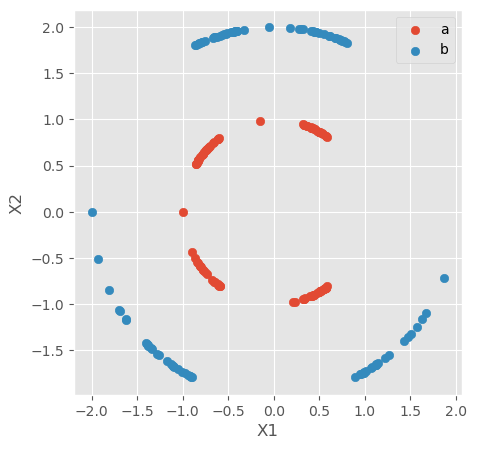

In [21]:
def plot_classes(data_df, class_col="class"):
    plt.figure(figsize=(5,5))
    for cls in data_df[class_col].unique():
        temp = data_df[data_df[class_col] == cls]
        plt.scatter(temp.X1, temp.X2, label=cls)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.show()
    
plot_classes(data, class_col="class")

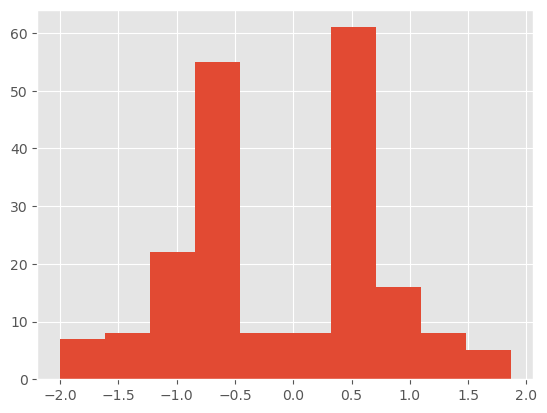

In [22]:
data.X1.hist()
plt.show()

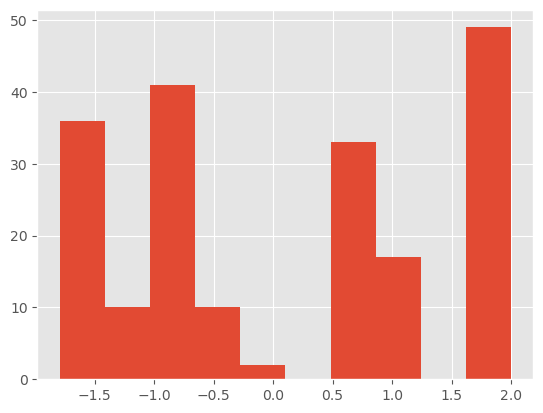

In [23]:
data.X2.hist()
plt.show()

The columns are note near normal. I will prefer to use min max scaler before PCA

### a) Apply PCA to reduce the number of dimensions to one and visualize the instances on a scatter plot. Note that the scatter plot will show the observation number versus the observed value (as we have a single feature to represent the instance).

[4.95601625 3.03317135]


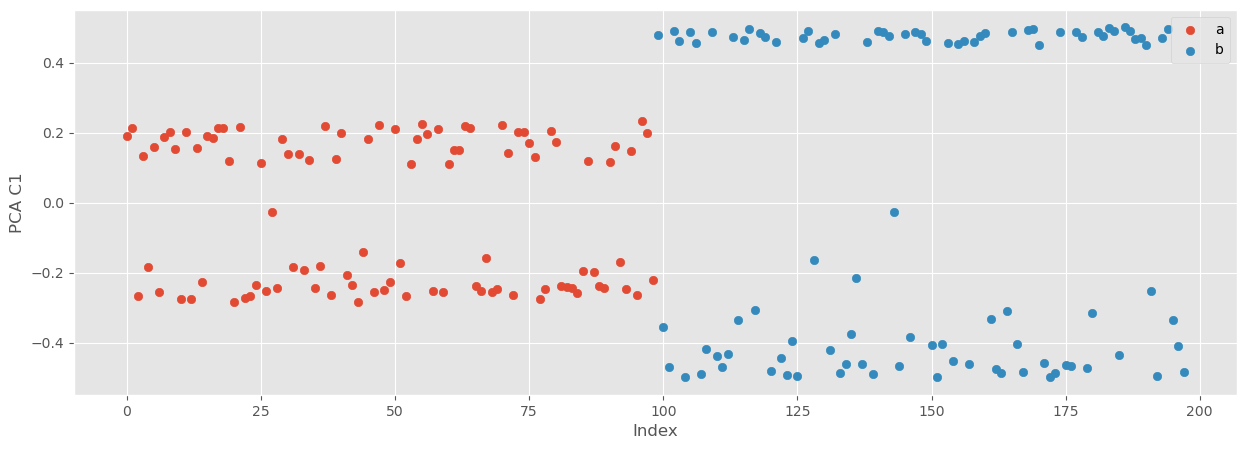

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

pca = PCA(n_components=None)
scaler = MinMaxScaler()

X = data[["X1", "X2"]].values
X = scaler.fit_transform(X)
X = pca.fit_transform(X)
reduced_dim = pca.fit_transform(X)[:, 0]
print(pca.singular_values_)
data["pca_dim"] = reduced_dim

plt.figure(figsize=(15,5))
for cls in data["class"].unique():
    temp = data[data["class"] == cls]
    plt.scatter(temp.index, temp.pca_dim, label=cls)
plt.xlabel("Index")
plt.ylabel("PCA C1")
plt.legend()
plt.show()

### b) Apply MDS to reduce the number of dimensions to one and visualize the instances on a scatter plot as in part (a). Use at least two different similarity measure. 

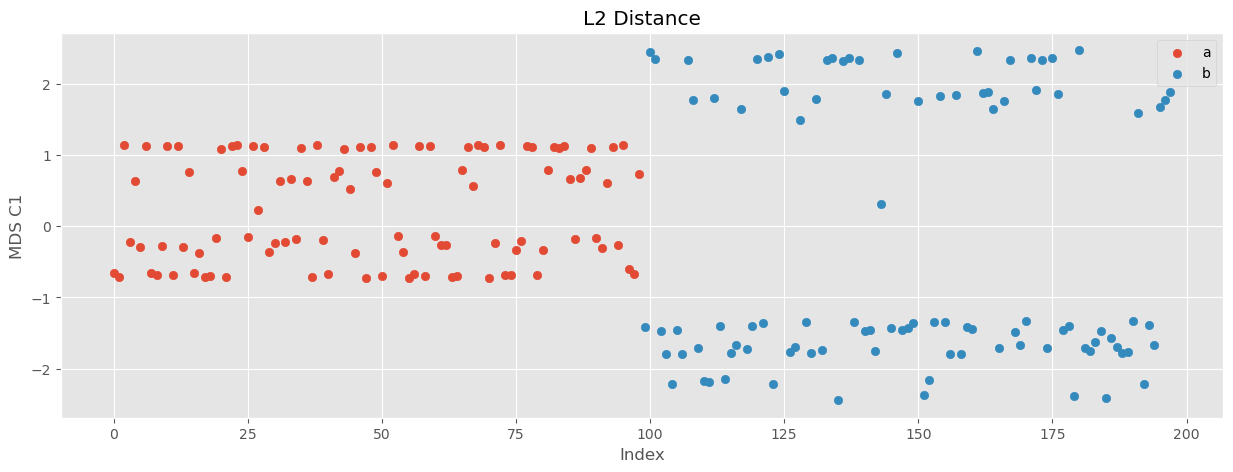

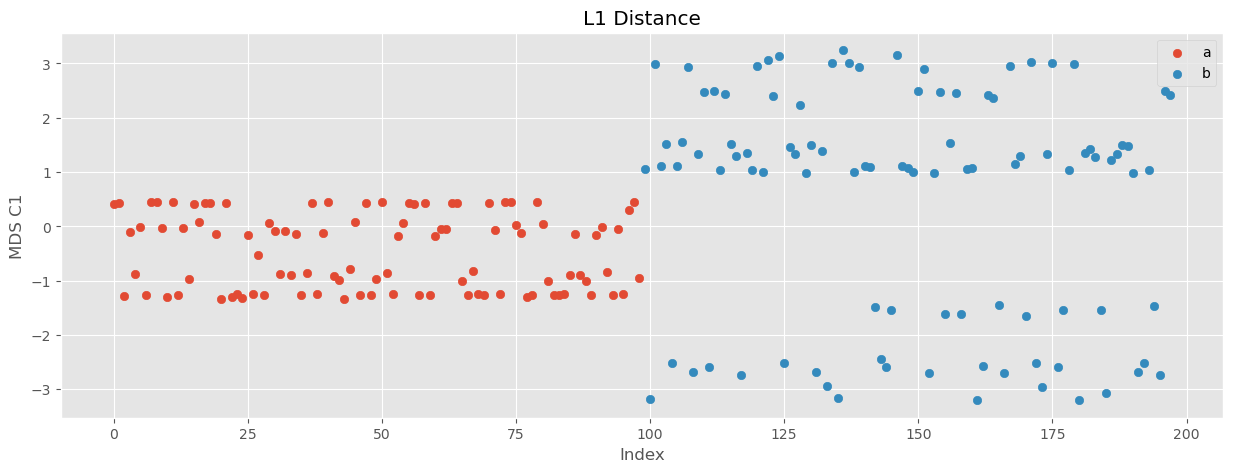

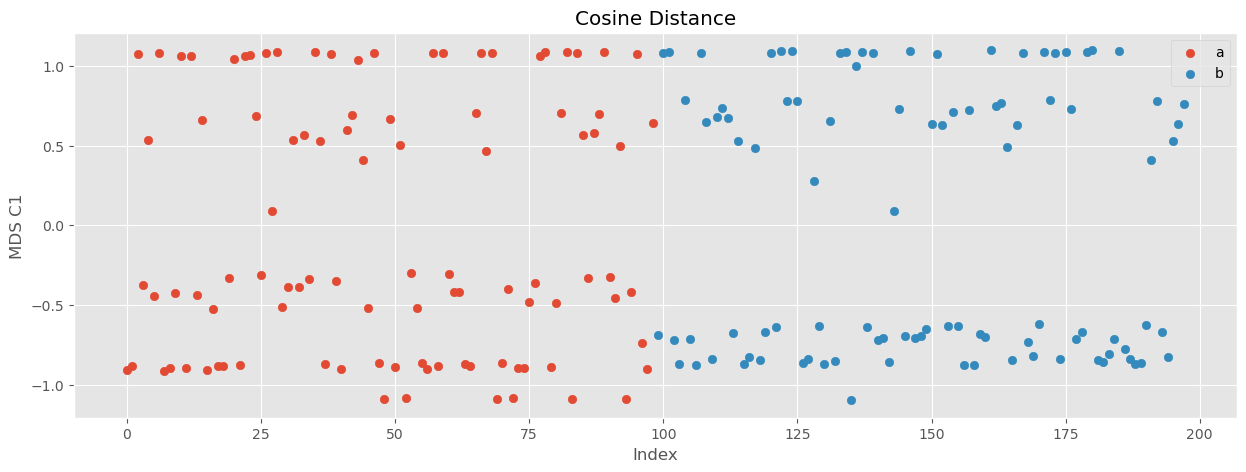

In [25]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances, cosine_distances

X = data[["X1", "X2"]].values
l2_dist_matrix = euclidean_distances(X)
l1_dist_matrix = manhattan_distances(X)
cos_dist_matrix = cosine_distances(X)

matrices = (l2_dist_matrix, l1_dist_matrix, cos_dist_matrix)
names = ("L2 Distance", "L1 Distance", "Cosine Distance")

for dist, name in zip(matrices, names):
    mds = MDS(n_components=1, dissimilarity="precomputed")
    mds_dim = mds.fit_transform(dist)
    
    col_name =f"mds_dim_{name}"
    data[col_name] = mds_dim
    
    plt.figure(figsize=(15,5))
    for cls in data["class"].unique():
        temp = data[data["class"] == cls]
        plt.scatter(temp.index, temp[col_name], label=cls)
    plt.xlabel("Index")
    plt.ylabel("MDS C1")
    plt.legend()
    plt.title(name)
    plt.show()
    
    

### c) On a 2D scatter plot, one can observe how two observations from two classes are different. 
1. What is your conclusion when you use PCA results in single dimension (your results from part a)?  
2. What is your conclusion when you use MDS results in single dimension (your results from part b)? Compare the results from different similarity measures used in part (b) 
3. Compare MDS results with PCA. What is your conclusion?

In [26]:
# COMMENTS HERE

### d) Suppose, you are not satisfied with your dimensionality reduction scheme in part (a). Add the following columns to your data, $X1^2$, $X2^2$, $X1× X2$ (three columns as functions of your original variables) and apply PCA. Comment on the PCA results (i.e. what are the eigenvalues? What do they refer to?).

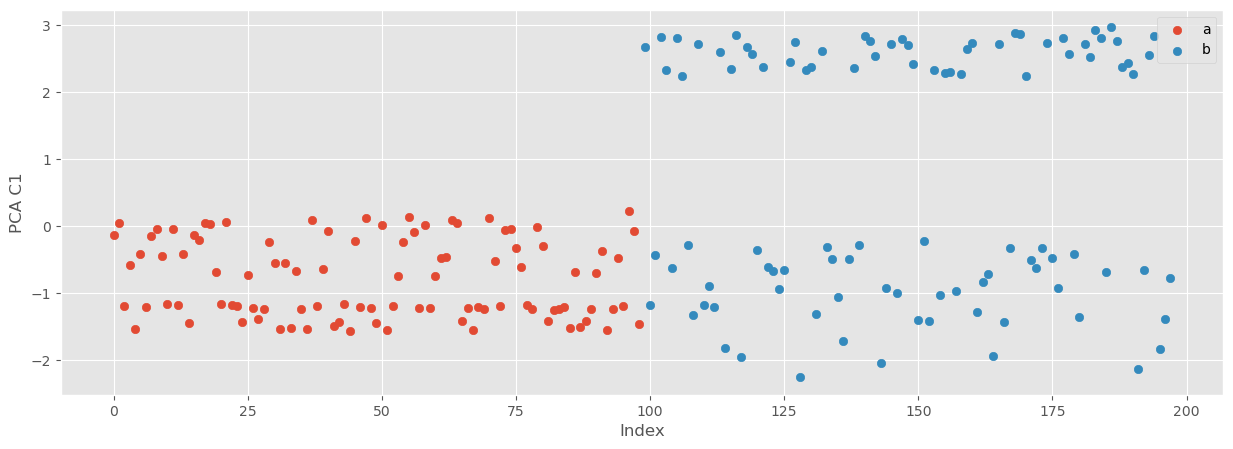

In [27]:
data["X1_sq"] = data.X1**2
data["X2_sq"] = data.X2**2
data["X1X2"] = data.X1 * data.X2

columns_to_use = ["X1", "X2", "X1_sq", "X2_sq", "X1X2"]

pca = PCA(n_components=None)
#scaler = MinMaxScaler()

X = data[columns_to_use].values
#X = scaler.fit_transform(X)

reduced_dim = pca.fit_transform(X)[:,0]
data["pca_dim"] = reduced_dim

plt.figure(figsize=(15,5))
for cls in data["class"].unique():
    temp = data[data["class"] == cls]
    plt.scatter(temp.index, temp.pca_dim, label=cls)
plt.xlabel("Index")
plt.ylabel("PCA C1")
plt.legend()
plt.show()

In [28]:
pca.singular_values_

array([22.15175961, 16.85780485, 15.92959491, 10.36739232,  7.76668506])

In [29]:
(pca.singular_values_**2)/(pca.singular_values_**2).sum()

array([0.410133  , 0.23752553, 0.21208879, 0.08983536, 0.05041731])

In [30]:
pca.explained_variance_ratio_

array([0.410133  , 0.23752553, 0.21208879, 0.08983536, 0.05041731])

In [31]:
# COMMENT

## Task 2 – Reconstructing Turkey Map

In [32]:
tr_dist = pd.read_excel("./ilmesafe.xls")
col_names = tr_dist.iloc[1].values
tr_dist.columns= col_names
tr_dist = tr_dist.iloc[2:].fillna(0).reset_index(drop=True)
tr_dist

,İL PLAKA NO,İL ADI,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
0,01,ADANA,0,335,575,966,603,567,535,1035,...,621,709,782,1042,1066,899,714,246,87,735
1,02,ADIYAMAN,335,0,910,648,632,814,870,751,...,303,471,1023,758,748,1147,955,210,248,976
2,03,AFYONKARAHİSAR,575,910,0,1318,597,300,290,1243,...,1196,1284,515,1351,1461,338,447,821,662,375
3,04,AĞRI,966,648,1318,0,738,1141,1428,396,...,369,430,1175,310,143,1363,1106,814,879,1192
4,05,AMASYA,603,632,597,736,0,413,825,695,...,796,982,437,783,881,625,368,639,608,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,YALOVA,899,1152,338,1361,625,407,601,1254,...,1411,1562,371,1362,1472,0,350,1120,987,171
77,78,KARABÜK,714,960,447,1104,368,215,734,970,...,1164,1350,89,1078,1215,350,0,928,801,179
78,79,KİLİS,246,210,821,814,644,715,781,917,...,469,557,1001,924,917,1125,933,0,159,949
79,80,OSMANİYE,87,248,662,879,613,579,622,948,...,534,622,869,955,982,986,801,159,0,822


In [33]:
dist_matrix = tr_dist.drop(columns=["İL PLAKA NO", "İL ADI"]).values
lower_tri = np.tril(dist_matrix)
upper_tri = np.triu(dist_matrix)
symm_lower_tri = (lower_tri + upper_tri.T)/2
symm_dist_matrix = symm_lower_tri + symm_lower_tri.T
# Is matrix symmetric now?
(symm_dist_matrix==symm_dist_matrix.T).all()

True

In [34]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="precomputed")
mds_dim = mds.fit_transform(symm_dist_matrix)
tr_dist[["MDS1", "MDS2"]] = mds_dim

plt.figure(figsize=(15,5))
plt.scatter(tr_dist.MDS1, -tr_dist.MDS2)
for txt, x, y in zip(tr_dist["İL ADI"], tr_dist["MDS1"], tr_dist["MDS2"]):
    plt.annotate(txt, (x,-y))
plt.show()

,İL PLAKA NO,İL ADI,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,...,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE,MDS1,MDS2
0,01,ADANA,0,335,575,966,603,567,535,1035,...,782,1042,1066,899,714,246,87,735,209.911713,314.117212
1,02,ADIYAMAN,335,0,910,648,632,814,870,751,...,1023,758,748,1147,955,210,248,976,503.891428,141.208173
2,03,AFYONKARAHİSAR,575,910,0,1318,597,300,290,1243,...,515,1351,1461,338,447,821,662,375,-381.240612,316.646160
3,04,AĞRI,966,648,1318,0,738,1141,1428,396,...,1175,310,143,1363,1106,814,879,1192,668.555339,-465.384751
4,05,AMASYA,603,632,597,736,0,413,825,695,...,437,783,881,625,368,639,608,454,-53.056286,-194.976228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,YALOVA,899,1152,338,1361,625,407,601,1254,...,371,1362,1472,0,350,1120,987,171,-639.540699,82.990530
77,78,KARABÜK,714,960,447,1104,368,215,734,970,...,89,1078,1215,350,0,928,801,179,-401.014633,-147.145450
78,79,KİLİS,246,210,821,814,644,715,781,917,...,1001,924,917,1125,933,0,159,949,440.234670,281.576812
79,80,OSMANİYE,87,248,662,879,613,579,622,948,...,869,955,982,986,801,159,0,822,306.832292,290.838130


The image seems like a rotated Turkey map. Since there is a linear relationship we can make use of pca to rotate the MDS cordinates to optain a more appropriate Turkey map.

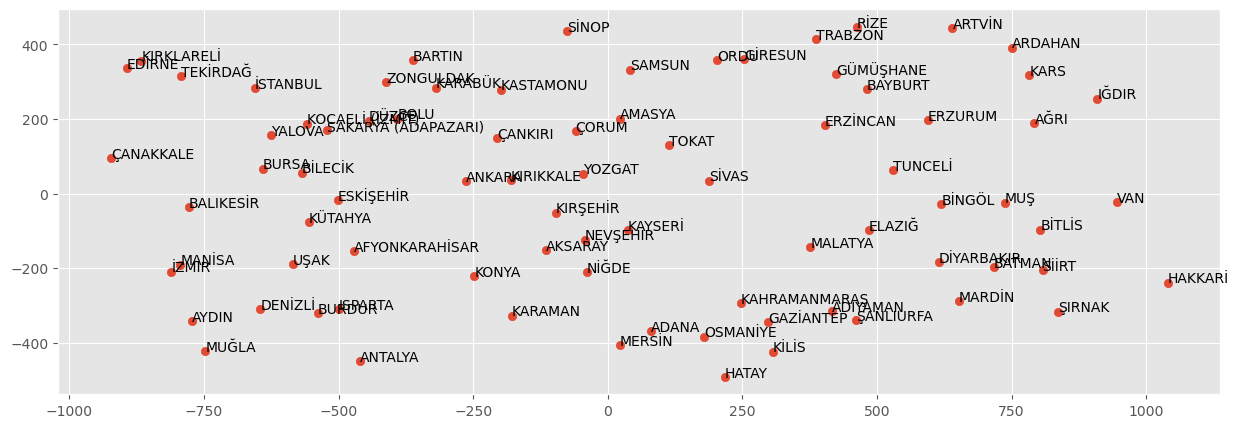

In [54]:
temp = tr_dist[["İL ADI", "MDS1", "MDS2"]].copy()
pca = PCA()
temp[["R_MDS1", "R_MDS2"]] = pca.fit_transform(temp[["MDS1", "MDS2"]].values)

plt.figure(figsize=(15,5))

plt.show()

It seems like our approach worked. This picture is much easier to interpret. It also looks like MDS has done a pretty good job. The cities are in the places where we would expect. Istanbul and the other European part is in location. Hatay goes below other cities. Mugla is in its corner and Ankar is in the middle if Cankiri Kirikkale Konya and Eskisehir. Also the overall look implies the shape of the country.

## Task 3 – Dimensionality reduction for time series data

In [180]:
def read_data(path):
    with open(path, "r") as file:
        lines = file.readlines()
    
    classes = [float(x.replace("  ", " ").split()[0]) for x in lines]
    lines = [list(map(float, x.replace("  ", " ").split()))[1:] for x in lines]
    return np.array(lines), classes

In [199]:
X_acc, X_classes = read_data("./uWaveGestureLibrary_X_TRAIN")
Y_acc, Y_classes = read_data("./uWaveGestureLibrary_Y_TRAIN")
Z_acc, Z_classes = read_data("./uWaveGestureLibrary_Z_TRAIN")

print(X_vals.shape, Y_vals.shape, Z_vals.shape)
assert X_classes == Y_classes 
assert X_classes == Z_classes

classes = X_classes
del X_classes, Y_classes, Z_classes

(896, 315) (896, 315) (896, 315)


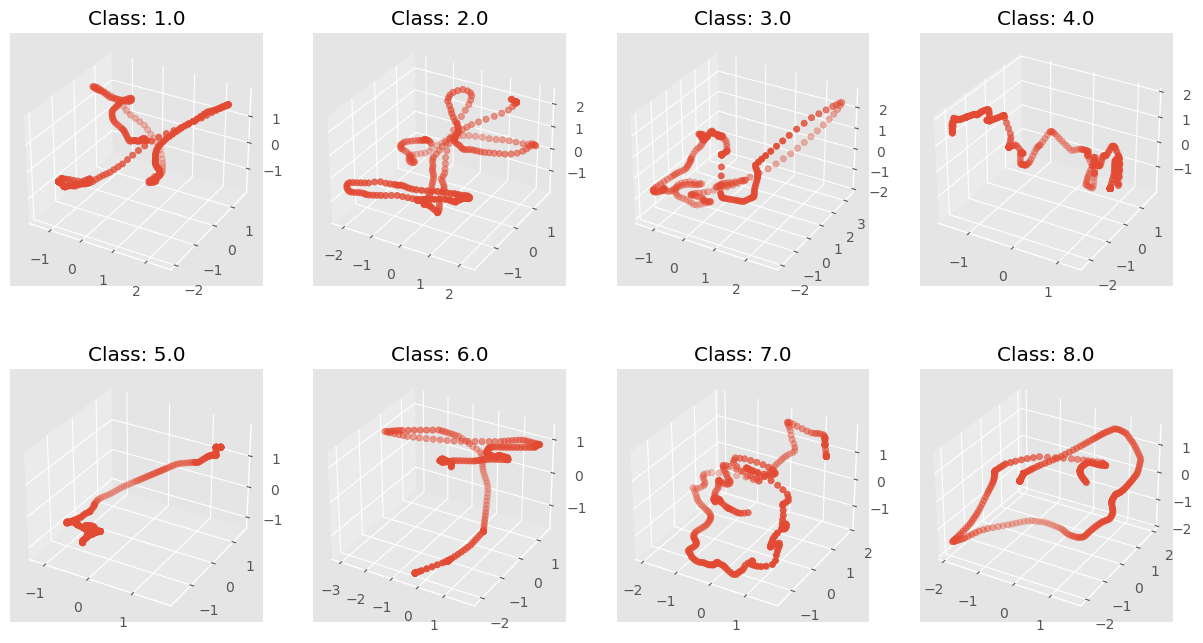

In [200]:
# Acc Plot
indices = {x:np.argmax(classes == x) for x in np.unique(classes)}

fig = plt.figure(figsize=(15,8))
for cls in indices:
    idx = indices[cls]
    ax = fig.add_subplot(2, 4, int(cls), projection='3d')
    ax.scatter(X_acc[idx], Y_acc[idx], Z_acc[idx])
    ax.set_title(f"Class: {cls}")

plt.show()

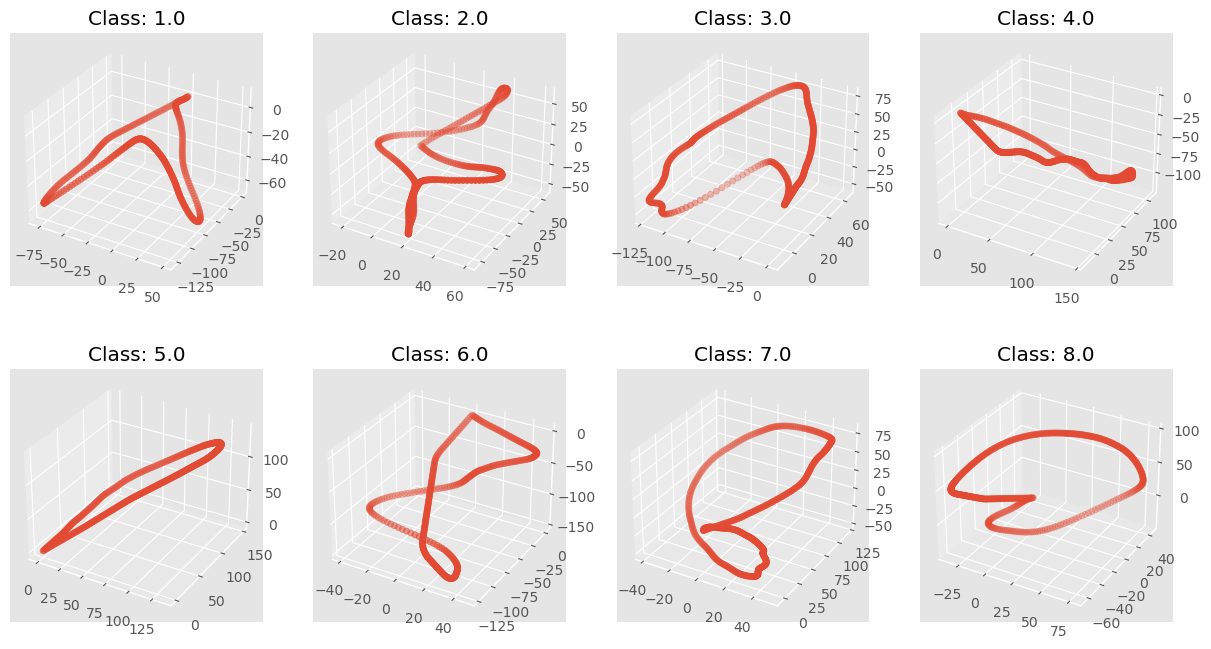

In [201]:
# Velocity plots
X_vel = np.cumsum(X_acc, axis=1)
Y_vel = np.cumsum(Y_acc, axis=1)
Z_vel = np.cumsum(Z_acc, axis=1)

X_pos = np.cumsum(X_vel, axis=1)
Y_pos = np.cumsum(Y_vel, axis=1)
Z_pos = np.cumsum(Z_vel, axis=1)

fig = plt.figure(figsize=(15,8))
for cls in indices:
    idx = indices[cls]
    ax = fig.add_subplot(2, 4, int(cls), projection='3d')
    ax.scatter(X_vel[idx], Y_vel[idx], Z_vel[idx])
    ax.set_title(f"Class: {cls}")

plt.show()

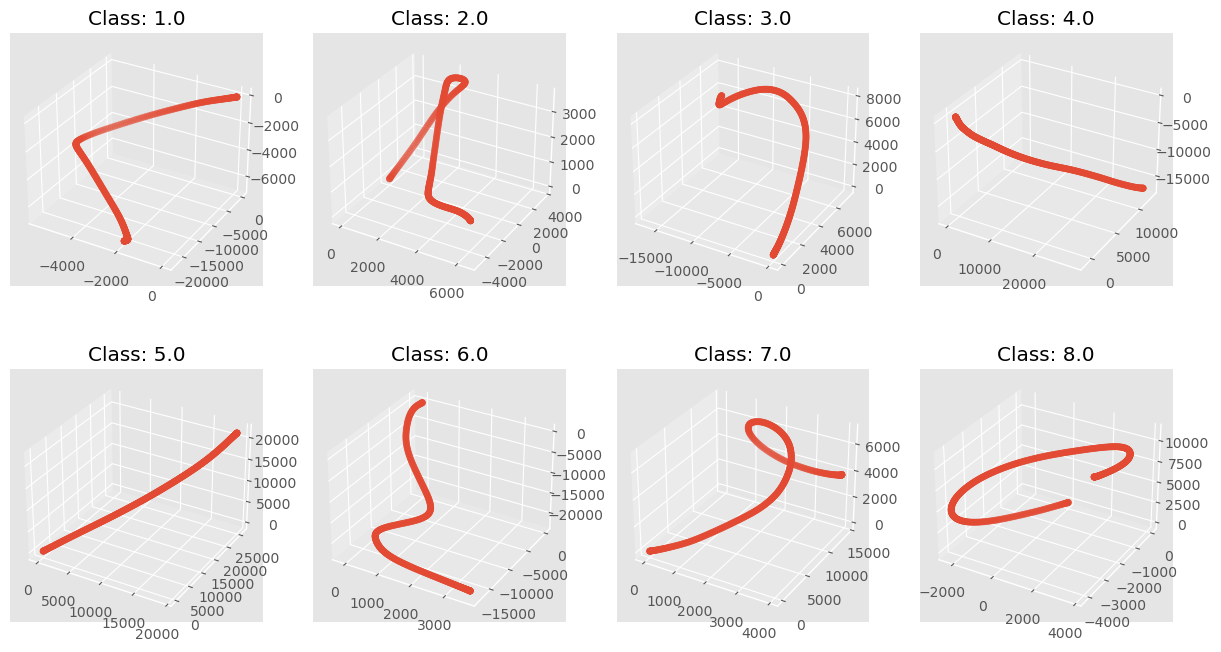

In [202]:
# Position plots
fig = plt.figure(figsize=(15,8))
for cls in indices:
    idx = indices[cls]
    ax = fig.add_subplot(2, 4, int(cls), projection='3d')
    ax.scatter(X_pos[idx], Y_pos[idx], Z_pos[idx])
    ax.set_title(f"Class: {cls}")

plt.show()

### b)
As you may have noticed, the data is provided as a regular data matrix (i.e. each row represents an
instance and columns represent the time index of the observations). Assume that X, Y and Z variables
are concatenated to obtain a single time series in an unusual way as follows:
concatenated series = [x1 x2 …. xT y1 y2 …. yT z1 z2 …. zT ]
In other words, the information from X, Y and Z axis are concatenated to obtain a single series of
length 3T (each axis is represented by a time series of length T).
Apply PCA to the time series from each class in the training data. You are expected to filter the data
from each class and apply PCA to the representation. Work on the following questions based on your
PCA application for the time series from each class.
• How much variability can be recovered by the first two components?
• Draw the each eigenvector (component) as a time series for each class. What do the
eigenvectors imply in this setting? In total, you are expected to provide 8 plots. Each plot is
expected to provide two time series (i.e. first eigenvector and the second eigenvector). Are
there any interesting patterns/observations? If yes, provide your comments

In [203]:
combined = np.concatenate([X_acc, Y_acc, Z_acc], axis=1)
combined.shape

(896, 945)

Class: 1 Var Ratio explained :  [0.17904256 0.14389665]
Class: 2 Var Ratio explained :  [0.24233135 0.10502656]
Class: 3 Var Ratio explained :  [0.2826148  0.13929554]
Class: 4 Var Ratio explained :  [0.24582047 0.12569057]
Class: 5 Var Ratio explained :  [0.31053818 0.13908702]
Class: 6 Var Ratio explained :  [0.2957444  0.15665905]
Class: 7 Var Ratio explained :  [0.29386355 0.15714279]
Class: 8 Var Ratio explained :  [0.37952703 0.21308152]


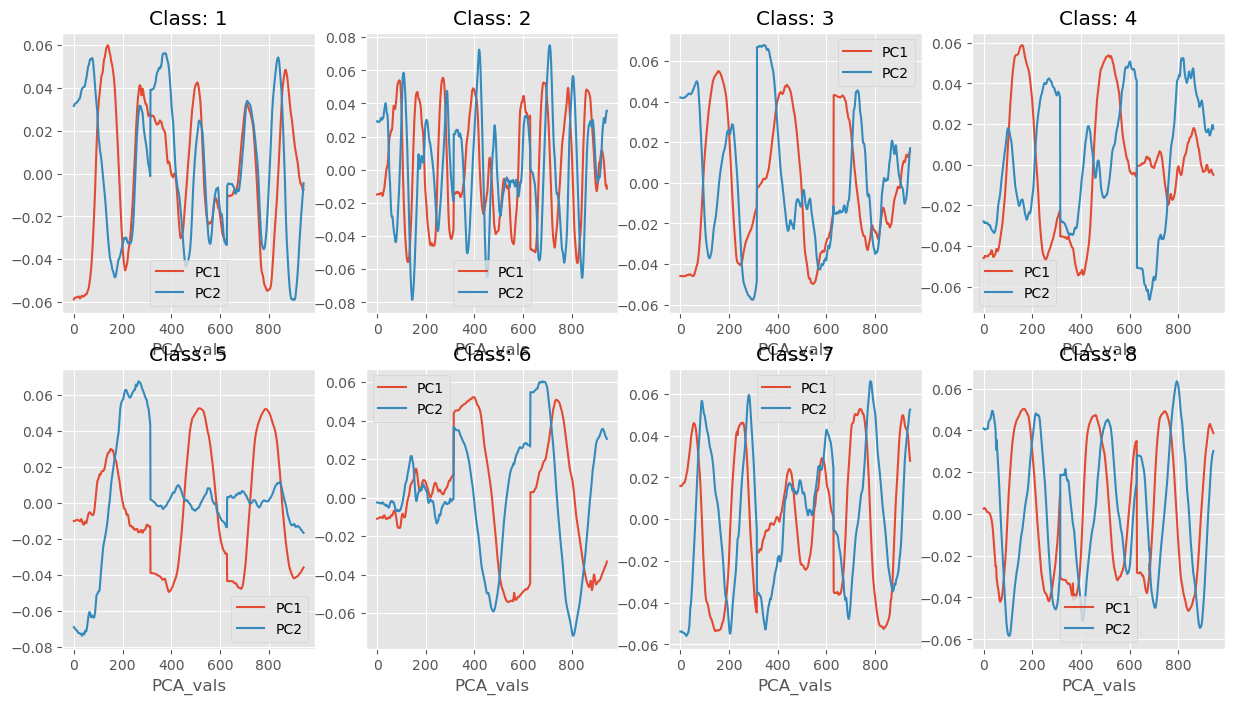

In [225]:
fig = plt.figure(figsize=(15,8))
for cls in np.unique(classes):
    idxs = (classes == cls)
    temp = combined[idxs]
    
    pca = PCA(n_components=None)
    temp = scaler.fit_transform(temp)
    pca.fit(temp)
    print(f"Class: {int(cls)} Var Ratio explained : ", pca.explained_variance_ratio_[:2])
    eigen_vec = pca.components_[:2]
    
    ax = fig.add_subplot(2, 4, int(cls))
    ax.plot(list(range(eigen_vec.shape[1])), eigen_vec[0], label="PC1")
    ax.plot(list(range(eigen_vec.shape[1])), eigen_vec[1], label="PC2")
    ax.set_xlabel("Index")
    ax.set_xlabel("PCA_vals")
    ax.set_title(f"Class: {int(cls)}")
    ax.legend()

plt.show()

In [ ]:
# COMMENTS